# Paper Plots

In [12]:
# Statistics
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Data Manipulation
import numpy as np
import pandas as pd
from collections import defaultdict, OrderedDict

# File Manipulation
from glob import glob
import json
import os
import sys

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

## Absolute Coefficient Increase Barplots

In [13]:
# Load all output files, which contain the statsmodels model.summary() tables as text, from which we can extract the parameters
outputs = glob('../job49_3/*.out')

# Dicts to store coefficient and confidence interavals
coef_dict = defaultdict(lambda: {})
CI_dict = defaultdict(lambda: {})

# Parse through the outputs and get the values
for output in outputs:
    print(output)
    with open(output, 'r', encoding='utf8') as in_file:
        for line in in_file.readlines():
            if "Subreddit:" in line:
                SUBREDDIT = line.split()[-1]
            if "LABEL:" in line:
                LABEL = line.split()[-1]  
            if "exposed_x_interrupted" in line and "time_x_exposed_x_interrupted" not in line:
                coef = float(line.split()[1])
                ci05 = float(line.split()[5])
                ci95 = float(line.split()[6])

        coef_dict[SUBREDDIT][LABEL] = coef
        CI_dict[SUBREDDIT][LABEL] = (abs(coef - ci05), abs(coef - ci95)) # matplotlib expect relative errors not absolute ones

../job49_3\slurm-13815599.out
../job49_3\slurm-13815600.out
../job49_3\slurm-13815601.out
../job49_3\slurm-13815602.out
../job49_3\slurm-13815603.out
../job49_3\slurm-13815604.out
../job49_3\slurm-13815605.out
../job49_3\slurm-13815606.out
../job49_3\slurm-13815607.out
../job49_3\slurm-13815608.out


In [14]:
# Convert the confidence intervals to the format expect by matplotlib for error bars
CI_bot = defaultdict(lambda: [None]*6)
CI_top = defaultdict(lambda: [None]*6)
for SUBREDDIT, stratas in CI_dict.items():
    for LABEL, CIs in stratas.items():
        if LABEL == 'ALL':
            pos = 0
        elif LABEL == 'LOW':
            pos = 1
        elif LABEL == 'MEDIUM':
            pos = 2
        elif LABEL == 'HIGH':
            pos = 3
        elif LABEL == 'near':
            pos = 4
        elif LABEL == 'far':
            pos = 5
        CI_bot[SUBREDDIT][pos] = CIs[0]
        CI_top[SUBREDDIT][pos] = CIs[1]

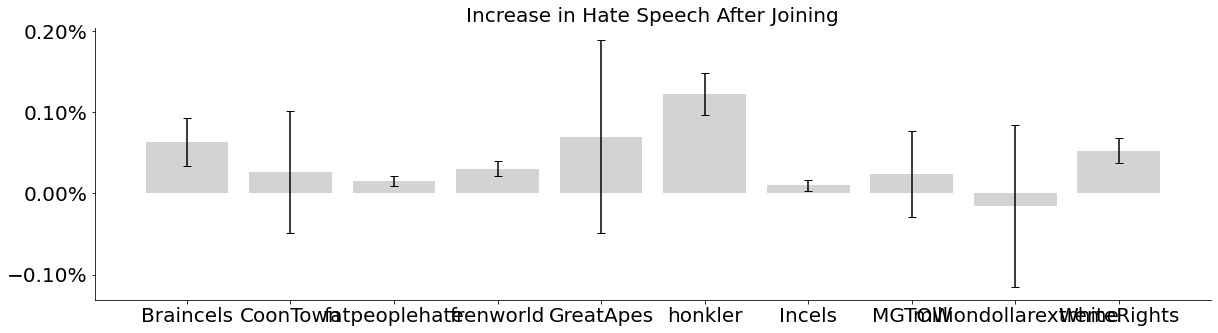

In [15]:
# Create figure
fig, ax = plt.subplots(figsize=(20, 5), sharey=True)

# Title = Subreddit
plt.title('Increase in Hate Speech After Joining', size=20)

for SUBREDDIT, stratas in coef_dict.items():

    # Barplot
    ax.bar(SUBREDDIT, stratas['ALL'], color='lightgray',
                yerr=np.asarray(CI_dict[SUBREDDIT]['ALL']).reshape(2, 1),
                ecolor='black', capsize=4)

# Axis
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=2))
ax.locator_params(axis ='y', nbins=6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
# plt.savefig(f"../figures_aggregated/Excess_Hate_Speech_Bar.png", bbox_inches='tight')
plt.show()

## Relative Coefficient Increase Barplots

In [16]:
# Load all output files, which contain the statsmodels model.summary() tables as text, from which we can extract the parameters
outputs = glob('../job49_3/*.out')

# Dicts to store coefficient and confidence interavals
increase_dict = defaultdict(lambda: {})
CI_dict = defaultdict(lambda: {})

# Parse through the outputs and get the values
for output in outputs:
    print(output)
    with open(output, 'r', encoding='utf8') as in_file:
        for line in in_file.readlines():
            if "Subreddit:" in line:
                SUBREDDIT = line.split()[-1]
            if "LABEL:" in line:
                LABEL = line.split()[-1]  

            if "const" in line:
                const = float(line.split()[1])
                ci05_const = float(line.split()[5])
                ci95_const = float(line.split()[6])
                
            if "exposed" in line and "x_exposed" not in line and 'exposed_x' not in line:
                exposed = float(line.split()[1])
                ci05_exposed = float(line.split()[5])
                ci95_exposed = float(line.split()[6])
                
            if "interrupted" in line and "x_interrupted" not in line and 'interrupted_x' not in line:
                interrupted = float(line.split()[1])
                ci05_interrupted = float(line.split()[5])
                ci95_interrupted = float(line.split()[6])
                
            if "exposed_x_interrupted" in line and "time_x_exposed_x_interrupted" not in line:
                exposed_x_interrupted = float(line.split()[1])
                ci05_exposed_x_interrupted = float(line.split()[5])
                ci95_exposed_x_interrupted = float(line.split()[6])
                
        pre = exposed + const 
        post =  const + interrupted + exposed + exposed_x_interrupted
        increase = (post - pre) / pre
        
        increase_dict[SUBREDDIT][LABEL] = increase
        # matplotlib expect relative errors not absolute ones
        CI_dict[SUBREDDIT][LABEL] = (abs(exposed_x_interrupted/(exposed+const) - ci05_exposed_x_interrupted/(exposed+const)), 
                                     abs(exposed_x_interrupted/(exposed+const) - ci95_exposed_x_interrupted/(exposed+const))) 

../job49_3\slurm-13815599.out
../job49_3\slurm-13815600.out
../job49_3\slurm-13815601.out
../job49_3\slurm-13815602.out
../job49_3\slurm-13815603.out
../job49_3\slurm-13815604.out
../job49_3\slurm-13815605.out
../job49_3\slurm-13815606.out
../job49_3\slurm-13815607.out
../job49_3\slurm-13815608.out


In [17]:
# Convert the confidence intervals to the format expect by matplotlib for error bars
CI_bot = defaultdict(lambda: [None]*6)
CI_top = defaultdict(lambda: [None]*6)
for SUBREDDIT, stratas in CI_dict.items():
    for LABEL, CIs in stratas.items():
        if LABEL == 'ALL':
            pos = 0
        elif LABEL == 'LOW':
            pos = 1
        elif LABEL == 'MEDIUM':
            pos = 2
        elif LABEL == 'HIGH':
            pos = 3
        elif LABEL == 'near':
            pos = 4
        elif LABEL == 'far':
            pos = 5
        CI_bot[SUBREDDIT][pos] = CIs[0]
        CI_top[SUBREDDIT][pos] = CIs[1]

In [18]:
increase_dict

defaultdict(<function __main__.<lambda>()>,
            {'Braincels': {'ALL': 0.9961579751122673},
             'CoonTown': {'ALL': 0.3353426176124161},
             'fatpeoplehate': {'ALL': 0.9058653384347226},
             'frenworld': {'ALL': 3.005023799008783},
             'GreatApes': {'ALL': 0.3706688159336405},
             'honkler': {'ALL': 2.4096738186779114},
             'Incels': {'ALL': 0.4033733172699179},
             'MGTOW': {'ALL': 0.6057681074766357},
             'milliondollarextreme': {'ALL': 0.3814540456268856},
             'WhiteRights': {'ALL': 0.5834294828288312}})

In [19]:
increase_dict_ordered = OrderedDict()
increase_dict_ordered['frenworld'] = increase_dict['frenworld']
increase_dict_ordered['honkler'] = increase_dict['honkler']
increase_dict_ordered['milliondollarextreme'] = increase_dict['milliondollarextreme']
increase_dict_ordered['CoonTown'] = increase_dict['CoonTown']
increase_dict_ordered['GreatApes'] = increase_dict['GreatApes']
increase_dict_ordered['WhiteRights'] = increase_dict['WhiteRights']
increase_dict_ordered['Braincels'] = increase_dict['Braincels']
increase_dict_ordered['Incels'] = increase_dict['Incels']
increase_dict_ordered['MGTOW'] = increase_dict['MGTOW']
increase_dict_ordered['fatpeoplehate'] = increase_dict['fatpeoplehate']

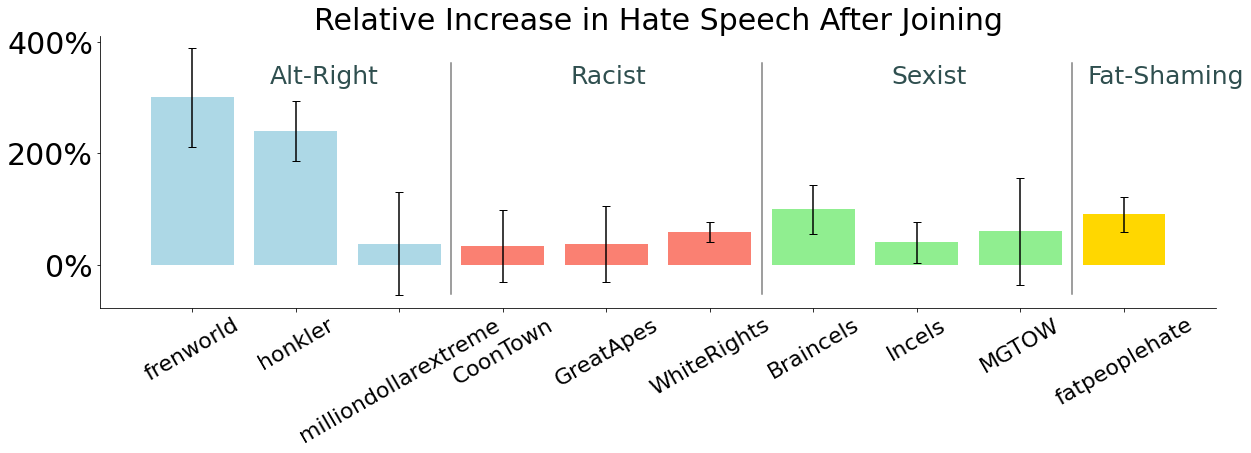

In [20]:
STRATA = 'ALL'

# Create figure
fig, ax = plt.subplots(figsize=(20, 5), sharey=True)

# Title = Subreddit
plt.title(f'Relative Increase in Hate Speech After Joining', size=30) #  | {STRATA.capitalize()} Users

color_code = ['lightblue', 'lightblue', 'lightblue', 'salmon', 'salmon', 'salmon', 'lightgreen', 'lightgreen', 'lightgreen', 'gold']

for idx, (SUBREDDIT, stratas) in enumerate(increase_dict_ordered.items()):

    # Barplot
    ax.bar(SUBREDDIT, stratas[STRATA], color=color_code[idx],
                yerr=np.asarray(CI_dict[SUBREDDIT][STRATA]).reshape(2, 1),
                ecolor='k', capsize=4)

# Axis
plt.xticks(fontsize=22, rotation=0)
plt.yticks(fontsize=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax.locator_params(axis ='y', nbins=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=30)

plt.axvline(x=2.5, ymin=0.05, ymax=0.9, color='gray')
plt.axvline(x=5.5, ymin=0.05, ymax=0.9, color='gray')
plt.axvline(x=8.5, ymin=0.05, ymax=0.9, color='gray')
plt.text(x=.75, y=3.25, s='Alt-Right', fontdict={'fontsize': 25, 'color':'darkslategray'})
plt.text(x=3.65, y=3.25, s='Racist', fontdict={'fontsize': 25, 'color':'darkslategray'})
plt.text(x=6.75, y=3.25, s='Sexist', fontdict={'fontsize': 25, 'color':'darkslategray'})
plt.text(x=8.65, y=3.25, s='Fat-Shaming', fontdict={'fontsize': 25, 'color':'darkslategray'})

# Show
plt.savefig(f"../figures_aggregated_first_hateful/Excess_Hate_Speech_Bar_{STRATA}.png", bbox_inches='tight')
plt.show()

## Gap Over Time

In [21]:
deltas_before= {}
deltas_after = {}

subreddits = list(increase_dict_ordered.keys())
stratas = ['ALL']

for SUBREDDIT in subreddits:
    for LABEL in stratas:
        deltas_before[(SUBREDDIT, LABEL)] = pd.read_csv(f'../effect_deltas/Effect_Delta_Before_{SUBREDDIT}_{LABEL}.csv', index_col='time')
        deltas_after[(SUBREDDIT, LABEL)] = pd.read_csv(f'../effect_deltas/Effect_Delta_After_{SUBREDDIT}_{LABEL}.csv', index_col='time')

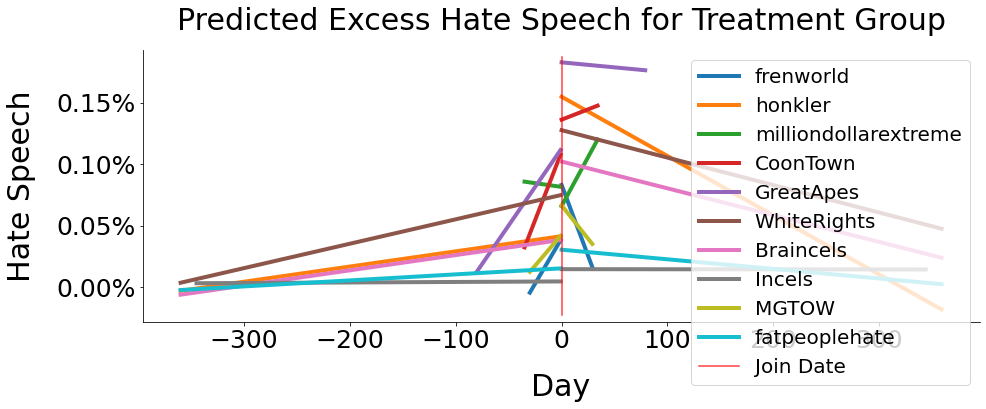

In [22]:
# Create figure
fig, ax = plt.subplots(figsize=(15,5))

# Plots
LABEL = 'ALL'
for idx, SUBREDDIT in enumerate(subreddits):
    ax.plot(deltas_before[(SUBREDDIT, LABEL)], lw=4, color=f'C{idx}', label=SUBREDDIT)
    ax.plot(deltas_after[(SUBREDDIT, LABEL)], lw=4, color=f'C{idx}')

# Add join date
plt.axvline(x=0, color='red', ymin=0.025, ymax=0.975, alpha=0.75, label=f'Join Date')

# Text
plt.title('Predicted Excess Hate Speech for Treatment Group', size=30, pad=20)
plt.xlabel('Day', fontsize=30, weight='normal', labelpad=20)
plt.ylabel('Hate Speech', fontsize=30, weight='normal', labelpad=20)
plt.legend(fontsize=20)

# Axis
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.locator_params(axis ='y', nbins=6)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
# plt.savefig(f"../figures_aggregated/Excess_Hate_Speech_Time.png", bbox_inches='tight')
plt.show()

# End